# Loan Prediction 
Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset 
includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
- Loan_ID
- Gender
- Married
- Dependents
- Education
- Self_Employed
- ApplicantIncome
- CoapplicantIncome
- Loan_Amount
- Loan_Amount_Term
- Credit History
- Property_Area
Dependent Variable (Target Variable):
- Loan_Status
You have to build a model that can predict whether the loan of the applicant will be 
approved or not on the basis of the details provided in the dataset

In [2]:
# import libraries 
import numpy as np  # preform numerical operation
import pandas as pd # for data manupulation
import seaborn as sns # use for data visualization
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

  ## Data Collection and Processing

In [3]:
# import loan_predicion dataset 
loan_dataset = pd.read_csv(r'loan_prediction.csv')

In [4]:
type(loan_dataset) # to check data type of dataset

pandas.core.frame.DataFrame

In [5]:
# printing the first five row of the dataset
loan_dataset.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# print the last five row of the dataset 
loan_dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
# statistical measures.
loan_dataset.describe()  # return the description of the data  in dataframe

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
loan_dataset.info()  # find the  shape of object type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Univariate analysis
Univariate analysis is when we analyze each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, a histogram or a box-plot can be used to look at the distribution of the variable. With a histogram, you can check the central tendency, variability, modality, and kurtosis of a distribution. Note that a histogram can’t show you if you have any outliers. This is why we also use box-plots.

In [9]:
# check the number of row and columns 
loan_dataset.shape  

(614, 13)

## Missing value and outlier treatment 

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

Missing value imputation
Let’s list out feature-wise count of missing values.

In [10]:
# find the number of missing value in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features. We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median
For categorical variables: imputation using mode

In [11]:
# drop the missing values
loan_dataset = loan_dataset.dropna()

In [12]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
# label encoding 
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}}, inplace = True)

In [14]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [15]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [16]:
loan_dataset = loan_dataset.replace(to_replace ='3+', value = 4)

## Data visualization 


<Axes: xlabel='Education', ylabel='count'>

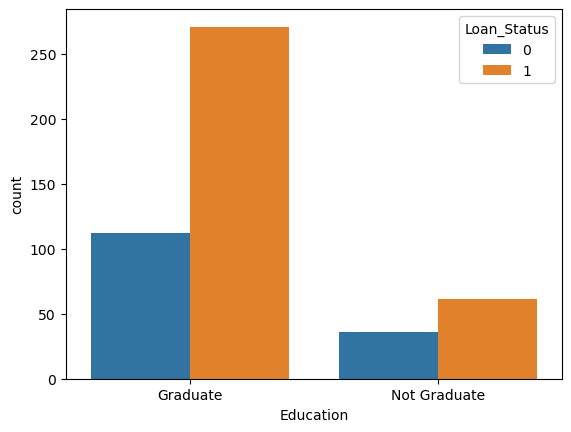

In [17]:
# Education and loan status
sns.countplot(x='Education', hue ='Loan_Status', data= loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

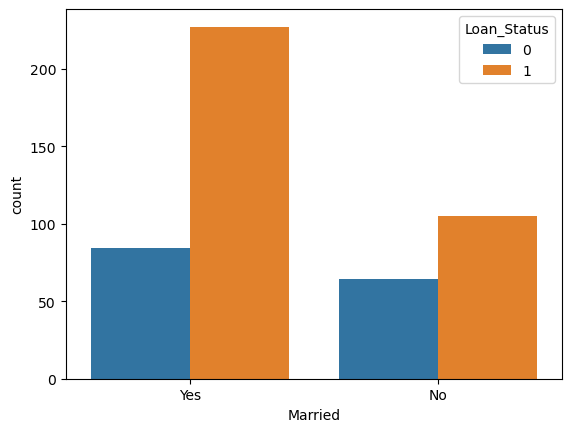

In [18]:
# marital status and Loan_status
sns.countplot(x = "Married", hue = "Loan_Status", data= loan_dataset)

<Axes: xlabel='Gender', ylabel='count'>

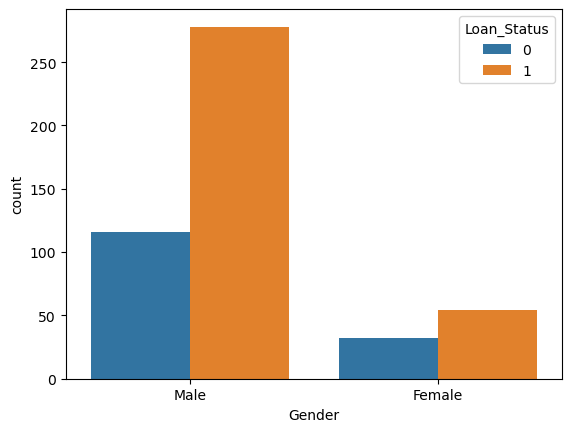

In [19]:
# Gender and Loan status
sns.countplot(x='Gender', hue ='Loan_Status', data =loan_dataset)

In [20]:
# convert Categorical value to numerical value
loan_dataset.replace({"Married" : {'No': 0, 'Yes' : 1}, 'Gender': { 'Male': 1, 'Female':0}, 'Education': {'Graduate':1, 'Not Graduate':0}, 'Self_Employed': {'Yes':1, 'No':0},'Property_Area':{'Rural':0, 'Semiurban':1,'Urban':2}}, inplace= True)

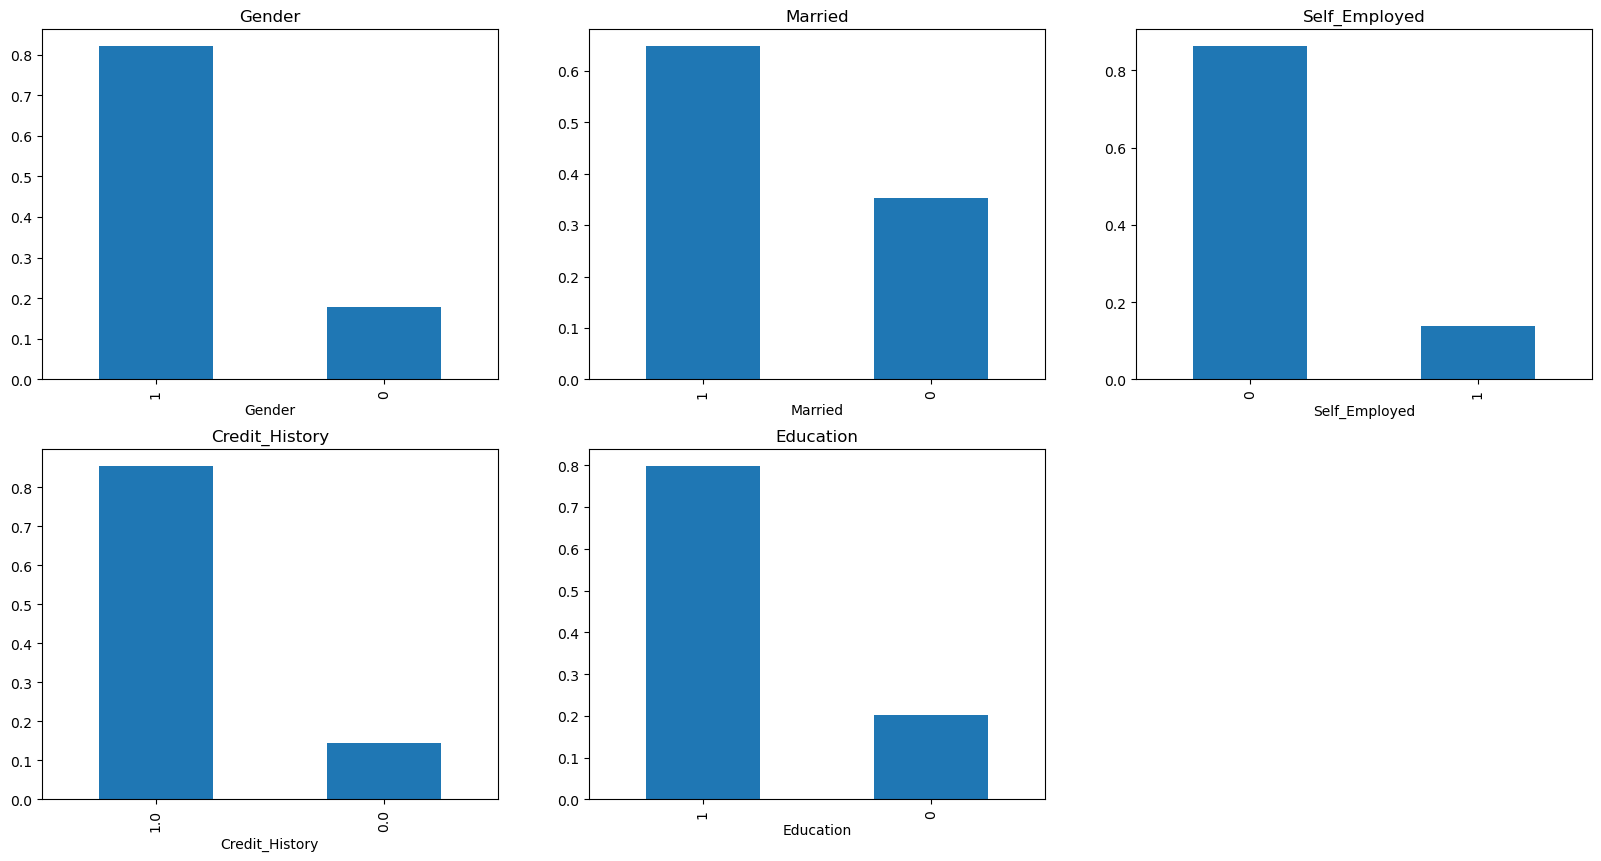

In [21]:
import matplotlib.pyplot as plt
# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
loan_dataset['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
loan_dataset['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
loan_dataset['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
loan_dataset['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
loan_dataset['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

It can be inferred from the above bar plots that:

80% applicants in the dataset are male.

Around 65% of the applicants in the dataset are married.

Around 15% applicants in the dataset are self employed.

Around 85% applicants have credit history (repaid their debts).

Around 80% of the applicants are Graduate.

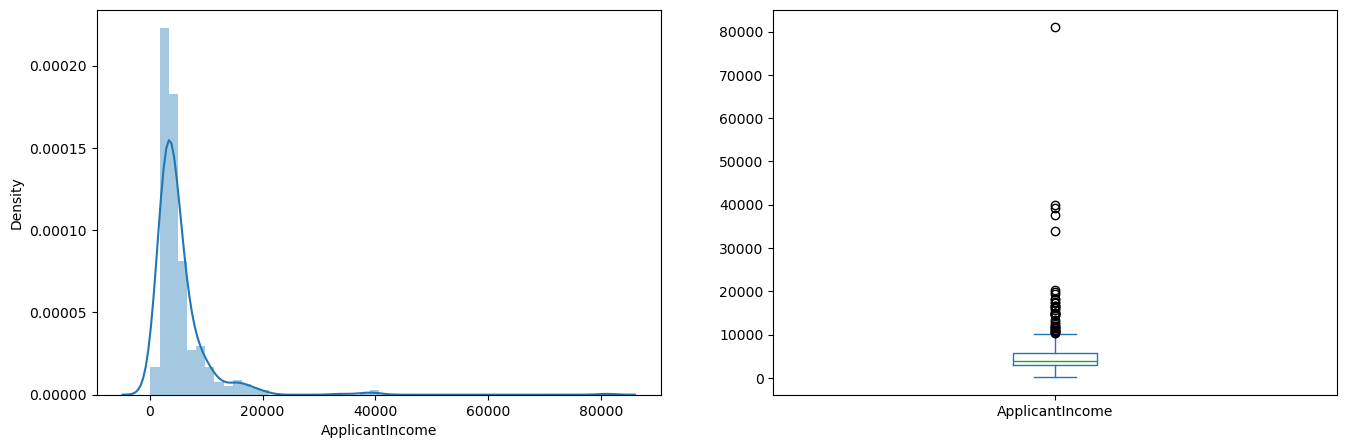

In [22]:

plt.subplot(121)
sns.distplot(loan_dataset['ApplicantIncome']);

plt.subplot(122)
loan_dataset['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. The distribution is right-skewed (positive skewness). We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:



Text(0.5, 0.98, '')

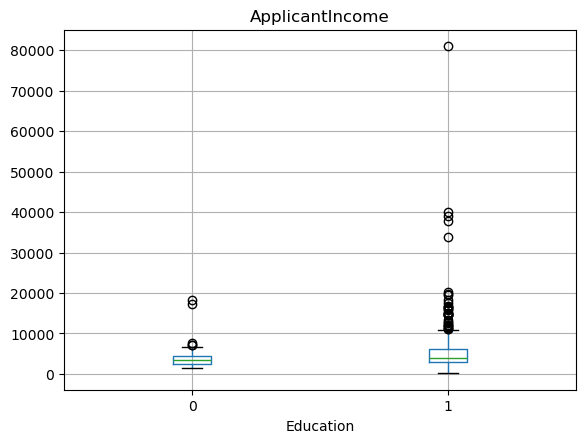

In [23]:
loan_dataset.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

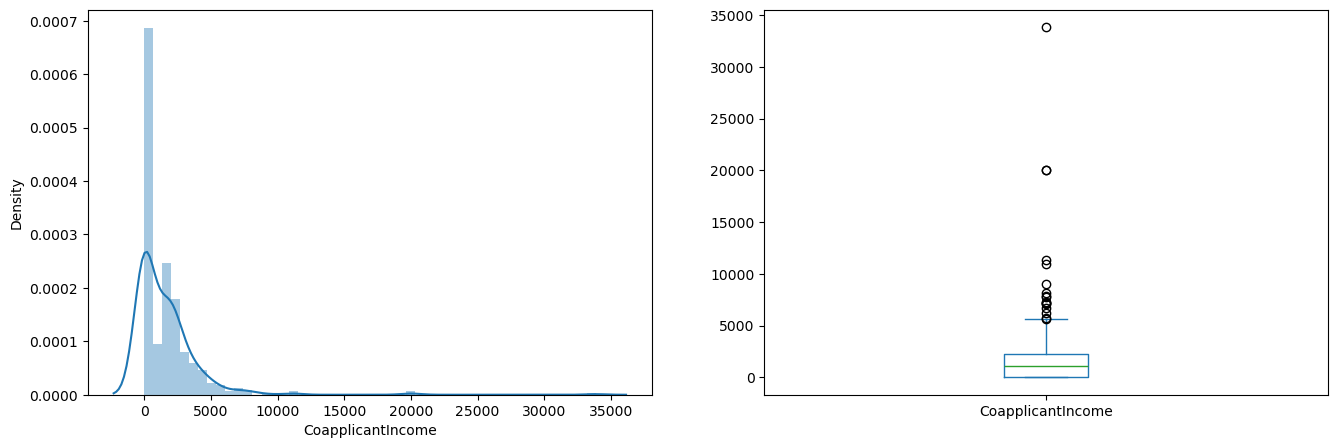

In [24]:
plt.subplot(121)
sns.distplot(loan_dataset['CoapplicantIncome']);

plt.subplot(122)
loan_dataset['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

In [25]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [26]:
# Separating the data and label
X = loan_dataset.drop(columns =['Loan_Status','Loan_ID'],axis = 1)
Y = loan_dataset ['Loan_Status']

In [27]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [28]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [29]:
# import libraries#
from sklearn.linear_model import LogisticRegression#
from sklearn.metrics import accuracy_score

 ## Train Test Split

In [30]:
#The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.1, 
stratify=Y, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [32]:
print(Y.shape, Y_train.shape, Y_test.shape)

(480,) (432,) (48,)


In [33]:
# take a look at the features (i.e. independent variables) in the dataset
X_train.columns, X_test.columns

(Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'),
 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [34]:
# show the data types for each column of the train set
X_train.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [35]:
## Training the model
## SVM(support vector model)
classifier = svm.SVC(kernel = 'linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

## Model Evaluation 

In [36]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [37]:
print('Accuracy score on training data :', training_data_accuracy)

Accuracy score on training data : 0.7986111111111112


In [42]:
 # accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [43]:
print('Accuracy score on test data :', test_data_accuracy)

Accuracy score on test data : 0.8333333333333334


# Applying PCA

In [44]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_



# Classification Algorithms

 ## Logistic Regression

In [47]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [48]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [49]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [50]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred,Y_test))

The accuracy of Logistic Regression is:  0.6875


In [52]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [53]:
cm

array([[ 0, 15],
       [ 0, 33]], dtype=int64)


 # K-NN

In [57]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [58]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [60]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, Y_test))

The accuracy of KNN is:  0.6458333333333334


In [61]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[ 4 11]
 [ 6 27]]



 # Decision Tree Classification

In [62]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [63]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [65]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Decision Tree Classifier is: ', metrics.accuracy_score(y_pred, Y_test))

The accuracy of Decision Tree Classifier is:  0.4791666666666667


In [67]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[ 6  9]
 [16 17]]



# Random Forest Classification

In [68]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [69]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [70]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Random Forest Classification is: ', metrics.accuracy_score(y_pred, Y_test))

The accuracy of Random Forest Classification is:  0.6041666666666666


In [71]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[ 7  8]
 [11 22]]


Results:
The accuracy of Logistic Regression is: 68.73 %

The accuracy of KNN is: 64.92 %

The accuracy of SVM is: 79.73 %

The accuracy of Decision Tree Classifier is: 47.63 %

The accuracy of Random Forest Classification is: 60.53 %

 # Saving Model using Pickle

In [75]:
import pickle
#Save the model using pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)